### Load Libraries  

In [1]:
#install the Pyterrier framework
!pip install python-terrier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.5/119.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.4/347.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.8 MB/s eta 0:00:

In [2]:
import pyterrier as pt
if not pt.started():
  pt.init()

<ipython-input-2-c43b832924c1>:2: DeprecationWarning: Call to deprecated function (or staticmethod) started. (use pt.java.started() instead) -- Deprecated since version 0.11.0.
  if not pt.started():


terrier-assemblies 5.10 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.10 (build: craigm 2024-08-22 17:33), helper_version=0.0.8]
<ipython-input-2-c43b832924c1>:3: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()


In [3]:
#install the Arabic stop words library
!pip install Arabic-Stopwords

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 9.9 MB/s eta 0:00:00


In [4]:
#we need to import the following libraries.
import pandas as pd
#to display the full text on the notebook without truncation
pd.set_option('display.max_colwidth', 150)
import numpy as np
import re
from snowballstemmer import stemmer
from tqdm import tqdm
import arabicstopwords.arabicstopwords as stp

### Data Cleaning

In [5]:
######################### removing Stop Words function ####################################

def remove_stop_words(sentence):
    terms=[]
    stopWords= set(stp.stopwords_list())
    for term in sentence.split() :
        if term not in stopWords :
           terms.append(term)
    return " ".join(terms)

############################# normalize function ###########################################

def normalize(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    return(text)

############################# stemming function ############################################

ar_stemmer = stemmer("arabic")
def stem(sentence):
    return " ".join([ar_stemmer.stemWord(i) for i in sentence.split()])


############################# perform first group of preprocessing steps ###############################


def preprocess1(sentence):
  sentence =remove_stop_words(sentence)
  sentence =normalize(sentence)
  return sentence


############################# normalize_tweets function ############################################


def normalize_tweets(text):
   if text is np.nan:
    return ""
   else:
    text = re.sub(r"http\S+", " ", text) # remove urls
    text = re.sub(r"RT ", " ", text) # remove rt
    text = re.sub(r"@[\w]*", " ", text) # remove handles
    text = re.sub(r"[\.\,\#_\|\:\?\?\/\=]", " ", text) # remove special characters
    text = re.sub(r'\t', ' ', text) # remove tabs
    text = re.sub(r'\n', ' ', text) # remove line jump
    text = re.sub(r"\s+", " ", text) # remove extra white space
    accents = re.compile(r'[\u064b-\u0652\u0640]') # harakaat and tatweel (kashida) to remove

    arabic_punc= re.compile(r'[\u0621-\u063A\u0641-\u064A\d+]+') # Keep only Arabic letters/do not remove numbers
    text=' '.join(arabic_punc.findall(accents.sub('',text)))
    text = text.strip()
    return text

############################# perform Second group of preprocessing steps ###############################

def preprocess2(sentence):
  sentence =remove_stop_words(sentence)
  sentence =normalize_tweets(sentence)
  return sentence

### Load Dataset

In [6]:

dataset_links=["https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-01.txt",
               "https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-02.txt",
               "https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-03.txt",
               "https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-04.txt",
               "https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-05.txt",
               "https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-06.txt",
               "https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-07.txt",
               "https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-08.txt",
               "https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-09.txt",
               "https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/tweets/evetar-q-10.txt"]

full_data=pd.DataFrame()
for i in tqdm(range(len(dataset_links))):
    tweets=pd.read_csv(dataset_links[i], sep='\t')
    full_data=pd.concat([full_data,tweets],ignore_index=True)
full_data.reset_index(inplace=True,drop=True)

#the docno will be our tweetID
full_data["docno"]=full_data["tweetID"].astype(str)


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


In [7]:
# preparing the data for index
full_data['Cleaned_text']=full_data['tweetText'].apply(preprocess2)

full_data

tweetID  \
0      549679192804061184   
1      549699343666532352   
2      549711593487888387   
3      549719610459967488   
4      549720880717508608   
...                   ...   
49995  561985373048299520   
49996  561987332878766081   
49997  561988825186971650   
49998  561991173360091136   
49999  561991342402715650   

                                                                                                                                        tweetText  \
0      الاعدام لعامل مطعم قتل زميله طعناً في "البيادر" أيدت محكمة التمييز الحكم الصادر عن محكمة الجنايات الكبرى والقاضي... http://t.co/H0txdjv3Kn   
1        #الأخبار ▪ تأجيل محاكمة 7 إرهابيين بسبب غياب الدفاع: أجلت محكمة الجنايات بالعاصمة إلى تاريخ لاحق محاكمة سبعة إ... http://t.co/GM4jmpAWbR   
2                                              @helale9999 عشآن أعطيتك وحده صميم صرت ترمي أعذار ...حقق العالميةة و أرجع كلمني يَ الأياب الانتحاري   
3                              #النهدي ثمانية قتلى في تفجير انتحاري بسيارة مفخخة أمام معملين للغاز في ريف حمص - شبكة الصين http://t.co/r5zFEuzAPu   
4                                              البحرين: ضبط مطلوبين متورطين في التفجير بالعكر الشرقي بقية الموضوع اضغط هنا http://t.co/t4A5bNrqyh   
...                                                                                                                                           ...   
49995                         مواسيا الشعب السعودي..حاكم دبي يبدأ جلسة مجلس الوزراء بقراءة الفاتحة على الملك عبدالله #الخبر #السعودية #saudi #ksa   
49996                                                                                                         @al_shalal @F_D_A82 تم تفجير صماخنا   
49997                                                          @aubyazid123 جزاك الله ألف خير ❌ جزاك الله خير ✔️ - كلمة ألف فيها تحجير لخير الله.   
49998                                                           كيف نفّذت «النصرة» عمليّة تفجير الحافلة اللبنانية في دمشق؟ http://t.co/TEmP1Dso1v   
49999                                                               @zvasoo جزاك الله ألف خير ❌ جزاك الله خير ✔️ - كلمة ألف فيها تحجير لخير الله.   

                    docno  \
0      549679192804061184   
1      549699343666532352   
2      549711593487888387   
3      549719610459967488   
4      549720880717508608   
...                   ...   
49995  561985373048299520   
49996  561987332878766081   
49997  561988825186971650   
49998  561991173360091136   
49999  561991342402715650   

                                                                                                  Cleaned_text  
0      الاعدام لعامل مطعم قتل زميله طعنا البيادر أيدت محكمة التمييز الحكم الصادر محكمة الجنايات الكبرى والقاضي  
1       الأخبار تأجيل محاكمة 7 إرهابيين بسبب غياب الدفاع أجلت محكمة الجنايات بالعاصمة تاريخ لاحق محاكمة سبعة إ  
2                             عشآن أعطيتك وحده صميم صرت ترمي أعذار حقق العالميةة أرجع كلمني ي الأياب الانتحاري  
3                                النهدي ثمانية قتلى تفجير انتحاري بسيارة مفخخة معملين للغاز ريف حمص شبكة الصين  
4                                          البحرين ضبط مطلوبين متورطين التفجير بالعكر الشرقي بقية الموضوع اضغط  
...                                                                                                        ...  
49995         مواسيا الشعب السعودي حاكم دبي يبدأ جلسة مجلس الوزراء بقراءة الفاتحة الملك عبدالله الخبر السعودية  
49996                                                                                          تم تفجير صماخنا  
49997                                                 جزاك الله ألف خير جزاك الله خير كلمة ألف تحجير لخير الله  
49998                                                           نفذت النصرة عملية تفجير الحافلة اللبنانية دمشق  
49999                                                 جزاك الله ألف خير جزاك الله خير كلمة ألف تحجير لخير الله  

[50000 rows x 4 columns]

load queries (topics titles) that are already defined and released with EveTAR dataset

In [8]:
#read the topics file from Github and use the titles as queries
topics=pd.read_csv("https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/topics.txt", sep='\t',names=['data'])
queries=[]
qid=[]
#we will get the queries and their ids from the topics file
for i in range(len(topics)):
    splitted=topics["data"][i:i+1][i].split(" ")
    if splitted[0]=="<title>":
       queries.append(' '.join(splitted[1:]))
    if splitted[0]=="<num>":
       qid.append(splitted[2])

queriesDF=pd.DataFrame()
queriesDF["qid"]=qid
queriesDF["query"]=queries

queriesDF

qid                                                query
0   E01                                  تفجير انتحاري في اب
1   E02                   ليتوانيا تستخدم اليورو بدل الليتاس
2   E03        فلسطين تطلب الانضمام للمحكمة الجنائية الدولية
3   E04                       وفاة أبو أنس الليبي في نيويورك
4   E05                    اختراق كوريا الشمالية حسابات سوني
5   E06                    بناء أول كنيسة في إسطنبول منذ قرن
6   E07                              باباندريو يؤسس حزب جديد
7   E08                        بوكو حرام تخطف شباب في نيجريا
8   E09          سيطرة بوكو حرام على قاعدة عسكرية في نيجيريا
9   E10                      مقتل مسلحين في غارات في باكستان
10  E11                       مقتل حوثيين في انفجار في اليمن
11  E12                     اكتشاف مقبرة أثرية لملكة فرعونية
12  E13                       قصف ناقلة نفط يونانية في ليبيا
13  E14                مقتل رجلي أمن سعوديين على حدود العراق
14  E15                         تأخر رحلة الاتحاد في أبو ظبي
15  E16                       فرض لبنان تأشيرة دخول للسوريين
16  E18                     قوات التحالف تقصف داعش في العراق
17  E19                     مقتل شرطي تركي في عملية انتحارية
18  E20                             هجوم مسلح على شارلي إبدو
19  E21                 تحديد المشتبه بهم في هجوم شارلي إبدو
20  E22                           تفجير سيارة مفخخة في صنعاء
21  E23                مطاردة المشتبه بهم في هجوم شارلي إبدو
22  E24                             هجمات على مساجد في فرنسا
23  E25             تفجير انتحاري في مسجدين للشيعة في العراق
24  E26                    حرق بوكو حرام بلدة باغا النيجيرية
25  E27                           مقتل منفذي هجوم شارلو إبدو
26  E30         مباراة أستراليا ضد الكويت في افتتاح أمم آسيا
27  E32             هجوم انتحاري على مقهى في طرابلس في لبنان
28  E33                 اشتباك في البحرين بين محتجين والشرطة
29  E35                  هجوم على جريدة ألمانية أساءت للرسول
30  E36                    طفلة فجرت نفسها في سوق في نيجيريا
31  E38        اختراق داعش حسابات القيادة المركزية الأمريكية
32  E39                فوز رونالدو بجائزة الكرة الذهبية 2014
33  E40         انتشال الصندوق الأسود لغرفة القيادة أير آسيا
34  E41                    إعادة محاكمة مبارك في قضية القصور
35  E42                      استقالة نابوليتانو رئيس إيطاليا
36  E43                افتتاح مونديال كرة اليد للرجال في قطر
37  E44                          خطف مدير مكتب الرئيس اليمني
38  E47                       استضافة غينيا لكأس أمم أفريقيا
39  E48                          سيطرة الحوثيين على قناة سبأ
40  E50                           داعش تهدد اليابان بالرهائن
41  E51                        استقالة الرئيس اليمني وحكومته
42  E54                    مقتل جنود لبنانيين قرب حدود سوريا
43  E56                  هزيمة داعش على يد الأكراد في كوباني
44  E57  مباراة العراق وكوريا الجنوبية في نصف نهائي كأس آسيا
45  E58               هجوم على فندق كورنثيا بطرابلس في ليبيا
46  E59                         هجوم حزب الله على مزارع شبعا
47  E60          تفجيرات في بغداد وسامراء والفلوجة في العراق
48  E63                  تفجير داعش مسجداً للشيعة في باكستان
49  E65                     إعادة تشكيل مجلس الوزراء السعودي

In [9]:
# apply the same prepration steps on the queries
queriesDF["query"]=queriesDF["query"].apply(preprocess2)
queriesDF

qid                                             query
0   E01                                  تفجير انتحاري اب
1   E02                ليتوانيا تستخدم اليورو بدل الليتاس
2   E03     فلسطين تطلب الانضمام للمحكمة الجنائية الدولية
3   E04                           وفاة أنس الليبي نيويورك
4   E05                 اختراق كوريا الشمالية حسابات سوني
5   E06                            بناء كنيسة إسطنبول قرن
6   E07                           باباندريو يؤسس حزب جديد
7   E08                        بوكو حرام تخطف شباب نيجريا
8   E09              سيطرة بوكو حرام قاعدة عسكرية نيجيريا
9   E10                         مقتل مسلحين غارات باكستان
10  E11                          مقتل حوثيين انفجار اليمن
11  E12                  اكتشاف مقبرة أثرية لملكة فرعونية
12  E13                       قصف ناقلة نفط يونانية ليبيا
13  E14                     مقتل رجلي سعوديين حدود العراق
14  E15                             تأخر رحلة الاتحاد ظبي
15  E16                    فرض لبنان تأشيرة دخول للسوريين
16  E18                     قوات التحالف تقصف داعش العراق
17  E19                     مقتل شرطي تركي عملية انتحارية
18  E20                              هجوم مسلح شارلي إبدو
19  E21                     تحديد المشتبه هجوم شارلي إبدو
20  E22                           تفجير سيارة مفخخة صنعاء
21  E23                    مطاردة المشتبه هجوم شارلي إبدو
22  E24                                 هجمات مساجد فرنسا
23  E25                تفجير انتحاري مسجدين للشيعة العراق
24  E26                 حرق بوكو حرام بلدة باغا النيجيرية
25  E27                        مقتل منفذي هجوم شارلو إبدو
26  E30         مباراة أستراليا ضد الكويت افتتاح أمم آسيا
27  E32                    هجوم انتحاري مقهى طرابلس لبنان
28  E33                     اشتباك البحرين محتجين والشرطة
29  E35                   هجوم جريدة ألمانية أساءت للرسول
30  E36                             طفلة فجرت سوق نيجيريا
31  E38     اختراق داعش حسابات القيادة المركزية الأمريكية
32  E39             فوز رونالدو بجائزة الكرة الذهبية 2014
33  E40      انتشال الصندوق الأسود لغرفة القيادة أير آسيا
34  E41                    إعادة محاكمة مبارك قضية القصور
35  E42                   استقالة نابوليتانو رئيس إيطاليا
36  E43                افتتاح مونديال كرة اليد للرجال قطر
37  E44                       خطف مدير مكتب الرئيس اليمني
38  E47                    استضافة غينيا لكأس أمم أفريقيا
39  E48                           سيطرة الحوثيين قناة سبأ
40  E50                        داعش تهدد اليابان بالرهائن
41  E51                     استقالة الرئيس اليمني وحكومته
42  E54                 مقتل جنود لبنانيين قرب حدود سوريا
43  E56                      هزيمة داعش يد الأكراد كوباني
44  E57  مباراة العراق وكوريا الجنوبية نصف نهائي كأس آسيا
45  E58                   هجوم فندق كورنثيا بطرابلس ليبيا
46  E59                          هجوم حزب الله مزارع شبعا
47  E60             تفجيرات بغداد وسامراء والفلوجة العراق
48  E63                   تفجير داعش مسجدا للشيعة باكستان
49  E65                  إعادة تشكيل مجلس الوزراء السعودي

### Create index

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
indexer = pt.DFIndexer("/content/drive/MyDrive/myFirstIndex", overwrite=True)
indexer.setProperty("tokeniser", "UTFTokeniser")

index_ref = indexer.index(full_data['Cleaned_text'], full_data["docno"])
index_ref.toString()

<ipython-input-11-c1c628504e69>:1: DeprecationWarning: Call to deprecated class DFIndexer. (use pt.terrier.IterDictIndexer().index(dataframe.to_dict(orient='records')) instead) -- Deprecated since version 0.11.0.
  indexer = pt.DFIndexer("/content/drive/MyDrive/myFirstIndex", overwrite=True)


14:19:35.512 [main] WARN org.terrier.structures.indexing.Indexer -- Adding an empty document to the index (549679192804061184) - further warnings are suppressed
14:20:07.197 [main] WARN org.terrier.structures.indexing.Indexer -- Indexed 40660 empty documents


'/content/drive/MyDrive/myFirstIndex/data.properties'

In [12]:
# we can use this command to load the index after creation on our drive
#index_ref = pt.IndexRef.of("/content/drive/MyDrive/myFirstIndex/data.properties")

index = pt.IndexFactory.of(index_ref)

### Retrieval Models


**Experiment 1: query expansion using RM3**

We will use BatchRetrieve PyTerrier class for retrieval using BM25 model. We will then apply query expansion using RM3 model and re-run the retrieval to see the effect of expansion.

**What is RM3?**

A relevance modelling (RM) approach to represent the topic described by the input query. RM3 benifits from a set of documents retrieved in response to that query, to generate a relevance model from which we can compute the probability of observing a term from these documents. Recall that the input query is one way to represent a topic, other representative terms can co-occur with these query terms.
 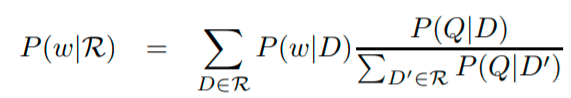
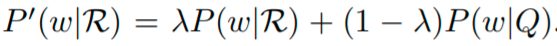

 The process we will perform is as follows:


1. Retrieve an initial set of "psuedo-relevant documents" using a retrieval model (e.g., BM25).
2. Use **RM3** method to score terms in these documents
3. Expand the current query with top terms from Step 2
4. Retrieve the final set of documents with the expanded query.


In [13]:
#set up our retieval model by specifing Hiemstra Language Model as wmodel and limiting the number of results for each query top 100 documents

JM_retr = pt.BatchRetrieve(index,wmodel="Hiemstra_LM",num_results=1000)


# set up Lambda to 0.95

JM_retr_highLambda = pt.BatchRetrieve(index,wmodel="Hiemstra_LM",controls ={"c":0.95},num_results=1000)


#set up our retieval model by specifing TF_IDF as wmodel and limiting the number of retrieved results for each query top 100 documents

tfidf_retr = pt.BatchRetrieve(index, controls = {"wmodel": "TF_IDF"},num_results=1000)


#specify BM25 as wmodel
bm25_retr = pt.BatchRetrieve(index, controls = {"wmodel": "BM25"},num_results=1000)




<ipython-input-13-bd4f1cedf2a9>:3: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  JM_retr = pt.BatchRetrieve(index,wmodel="Hiemstra_LM",num_results=1000)
<ipython-input-13-bd4f1cedf2a9>:8: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  JM_retr_highLambda = pt.BatchRetrieve(index,wmodel="Hiemstra_LM",controls ={"c":0.95},num_results=1000)
<ipython-input-13-bd4f1cedf2a9>:13: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  tfidf_retr = pt.BatchRetrieve(index, controls = {"wmodel": "TF_IDF"},num_results=1000)
<ipython-input-13-bd4f1cedf2a9>:17: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  bm25_retr = pt.BatchRetrieve(index, controls = {"wmodel

In [15]:
# "rewrite" function from PyTerrier will be used to expand queries specifying RM3 as the model
# fb_docs ==> no. expansion documents
# fb_terms ==> no. expansion terms
rm3_expander = pt.rewrite.RM3(index,fb_terms=10, fb_docs=100)

# For RM3, we need to first retrieve a set of "psuedo-relevant documents" then pass them to the expansion model
rm3_qe = bm25_retr >> rm3_expander


In [16]:
# We will run the full pipeline explained above. PyTerrier made it as easy as follows
rm3_pipe = bm25_retr >> rm3_expander >> bm25_retr


### Testing


In [23]:
#RetrIEve using the Jelinek-Mercer smoothing where lambda=0.15 (default)
JM_res=JM_retr.transform(queriesDF)


#RetrIEve using the Jelinek-Mercer smoothing where lambda= 0.95 (default)
JM_res_Lambda=JM_retr_highLambda.transform(queriesDF)
JM_res_Lambda[:3]


qid  docid               docno  rank     score  \
0  E39    127  550045141746987008     0  3.711443   
1  E39    213  550202293598294016     1  3.711443   
2  E39    943  550421966239170560     2  3.711443   

                                   query  
0  فوز رونالدو بجائزة الكرة الذهبية 2014  
1  فوز رونالدو بجائزة الكرة الذهبية 2014  
2  فوز رونالدو بجائزة الكرة الذهبية 2014

In [25]:
#the queries dataframe should have qid and query columns
tfidf_res=tfidf_retr.transform(queriesDF)
tfidf_res[:10]

qid  docid               docno  rank     score  \
0  E39    994  550439545091543040     0  2.235234   
1  E39   6364  551738982724157440     1  2.235234   
2  E39  26204  554715041652436992     2  2.235234   
3  E39  26731  554789416011857920     3  2.235234   
4  E39  26897  554858240844918784     4  2.235234   
5  E39  28000  555027643918082049     5  2.235234   
6  E39    127  550045141746987008     6  2.159215   
7  E39    213  550202293598294016     7  2.159215   
8  E39    943  550421966239170560     8  2.159215   
9  E39    951  550423736533671936     9  2.159215   

                                   query  
0  فوز رونالدو بجائزة الكرة الذهبية 2014  
1  فوز رونالدو بجائزة الكرة الذهبية 2014  
2  فوز رونالدو بجائزة الكرة الذهبية 2014  
3  فوز رونالدو بجائزة الكرة الذهبية 2014  
4  فوز رونالدو بجائزة الكرة الذهبية 2014  
5  فوز رونالدو بجائزة الكرة الذهبية 2014  
6  فوز رونالدو بجائزة الكرة الذهبية 2014  
7  فوز رونالدو بجائزة الكرة الذهبية 2014  
8  فوز رونالدو بجائزة الكرة الذهبية 2014  
9  فوز رونالدو بجائزة الكرة الذهبية 2014

In [26]:

#the queries dataframe should have qid and query columns
bm25_res=bm25_retr.transform(queriesDF)
bm25_res[:10]

qid  docid               docno  rank     score  \
0  E39    994  550439545091543040     0  4.090013   
1  E39   6364  551738982724157440     1  4.090013   
2  E39  26204  554715041652436992     2  4.090013   
3  E39  26731  554789416011857920     3  4.090013   
4  E39  26897  554858240844918784     4  4.090013   
5  E39  28000  555027643918082049     5  4.090013   
6  E39    127  550045141746987008     6  3.950914   
7  E39    213  550202293598294016     7  3.950914   
8  E39    943  550421966239170560     8  3.950914   
9  E39    951  550423736533671936     9  3.950914   

                                   query  
0  فوز رونالدو بجائزة الكرة الذهبية 2014  
1  فوز رونالدو بجائزة الكرة الذهبية 2014  
2  فوز رونالدو بجائزة الكرة الذهبية 2014  
3  فوز رونالدو بجائزة الكرة الذهبية 2014  
4  فوز رونالدو بجائزة الكرة الذهبية 2014  
5  فوز رونالدو بجائزة الكرة الذهبية 2014  
6  فوز رونالدو بجائزة الكرة الذهبية 2014  
7  فوز رونالدو بجائزة الكرة الذهبية 2014  
8  فوز رونالدو بجائزة الكرة الذهبية 2014  
9  فوز رونالدو بجائزة الكرة الذهبية 2014

### **Evaluating our results**
To evaluate the results we need qrels (relevance judgements). The qrels should be in [TREC format](https://trec.nist.gov/).

In [27]:
qrels=pd.read_csv("https://raw.githubusercontent.com/telsayed/IR-in-Arabic/master/Summer2021/data/EveTAR/qrels.txt", sep='\t',names=['qid','Q0','docno','label'])
qrels['docno']=qrels['docno'].astype(str)
qrels['qid']=qrels['qid'].astype(str)
qrels[:10]

qid  Q0               docno  label
0  E01  Q0  549711593487888387      0
1  E01  Q0  549719610459967488      0
2  E01  Q0  549720880717508608      0
3  E01  Q0  549724286575861761      0
4  E01  Q0  549780004230283264      0
5  E01  Q0  549846940284764161      0
6  E01  Q0  549879792745476096      0
7  E01  Q0  549880138033135617      0
8  E01  Q0  549885694814863360      0
9  E01  Q0  549887667492503554      0

In [ ]:
from pyterrier.measures import *



In [35]:
pt.Experiment([bm25_retr, rm3_pipe],
            queriesDF,
            qrels,
           [P@1,P@10,NDCG@5, R@20,R@1000],
            names=["BM25", "BM25+RM3"])

name   P@1   P@10    nDCG@5      R@20    R@1000
0      BM25  0.02  0.012  0.014455  0.000872  0.007987
1  BM25+RM3  0.00  0.016  0.013217  0.000940  0.007987

In [37]:
#Comparing different PRF approaches using PyTerrier

# We will run the full pipeline explained above. PyTerrier made it as easy as follows
lm_jm = pt.BatchRetrieve(index,wmodel="Hiemstra_LM",controls ={"c":0.7},num_results=1000)
rm3_pipe = lm_jm >> pt.rewrite.RM3(index, fb_terms=5, fb_docs=100) >> lm_jm
kld_pipe = lm_jm >> pt.rewrite.KLQueryExpansion(index, fb_terms=5, fb_docs=100) >> lm_jm
bo1_pipe = lm_jm >> pt.rewrite.Bo1QueryExpansion(index,fb_terms=5, fb_docs=100) >> lm_jm

pt.Experiment([lm_jm, rm3_pipe, kld_pipe, bo1_pipe],
            queriesDF,
            qrels,
            [P@1,P@10,NDCG@5, R@20,R@100],
            names=["LM", "LM+RM3","LM+KLD","LM+Bo1"])

<ipython-input-37-9218b5df9c84>:4: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  lm_jm = pt.BatchRetrieve(index,wmodel="Hiemstra_LM",controls ={"c":0.7},num_results=1000)


name  P@1   P@10    nDCG@5     R@20     R@100
0      LM  0.0  0.016  0.013217  0.00094  0.005973
1  LM+RM3  0.0  0.016  0.013217  0.00094  0.005973
2  LM+KLD  0.0  0.016  0.013217  0.00094  0.005973
3  LM+Bo1  0.0  0.016  0.013217  0.00094  0.005973

In [42]:
pt.Experiment([lm_jm, rm3_pipe, kld_pipe, bo1_pipe, JM_retr, JM_retr_highLambda, bm25_retr, tfidf_retr],
              queriesDF,
              qrels,
             [P@1,P@10,NDCG@5, R@20,R@100],
              names=["LM", "LM+RM3","LM+KLD","LM+Bo1","JM_retr","JM_retr_highLambda","bm25_retr","tfidf_retr"])



name   P@1   P@10    nDCG@5      R@20     R@100
0                  LM  0.00  0.016  0.013217  0.000940  0.005973
1              LM+RM3  0.00  0.016  0.013217  0.000940  0.005973
2              LM+KLD  0.00  0.016  0.013217  0.000940  0.005973
3              LM+Bo1  0.00  0.016  0.013217  0.000940  0.005973
4             JM_retr  0.00  0.016  0.013217  0.000940  0.005973
5  JM_retr_highLambda  0.00  0.016  0.013217  0.000940  0.005973
6           bm25_retr  0.02  0.012  0.014455  0.000872  0.005772
7          tfidf_retr  0.02  0.012  0.014455  0.000872  0.005772

### **References**


* [PyTerrier  retrieval and evaluation notebook](https://github.com/terrier-org/pyterrier/blob/master/examples/notebooks/retrieval_and_evaluation.ipynb).
*   [PyTerrier documentation.](https://pyterrier.readthedocs.io/_/downloads/en/latest/pdf/)

* Tamer Elsayed, Lectures notes and Labs, Qatar University  
